In [34]:
pip install missingno

In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
        
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [90]:
df = pd.read_csv('E:/edubridge/fetal_health_train.csv')
df.shape

(1700, 22)

In [91]:
df_validate = pd.read_csv('E:/edubridge/fetal_health_validate.csv')
df_validate.shape

(426, 21)

In [92]:
df_test = pd.read_csv('E:/edubridge/fetal_health_test.csv')
df_test.shape

(426, 21)

In [29]:
df.head()    # check the first 5 records

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,142.0,0.000,0.000,0.007,0.000,0.0,0.0,58.0,0.4,9.0,...,136.0,156.0,0.0,0.0,148.0,147.0,149.0,1.0,0.0,1.0
1,122.0,0.000,0.000,0.006,0.002,0.0,0.0,27.0,1.4,4.0,...,91.0,144.0,4.0,0.0,126.0,120.0,122.0,6.0,0.0,1.0
2,129.0,0.005,0.003,0.001,0.000,0.0,0.0,34.0,1.7,0.0,...,78.0,196.0,10.0,0.0,137.0,136.0,137.0,6.0,0.0,1.0
3,136.0,0.006,0.000,0.008,0.000,0.0,0.0,45.0,0.8,2.0,...,129.0,158.0,2.0,0.0,144.0,143.0,145.0,1.0,0.0,1.0
4,144.0,0.000,0.000,0.006,0.000,0.0,0.0,32.0,1.0,0.0,...,122.0,160.0,1.0,0.0,150.0,147.0,149.0,2.0,1.0,1.0


In [60]:
df_validate.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,135.0,0.011,0.002,0.004,0.0,0.0,0.0,60.0,0.9,0.0,...,39.0,124.0,163.0,1.0,0.0,148.0,143.0,146.0,6.0,0.0
1,120.0,0.008,0.000,0.005,0.0,0.0,0.0,43.0,1.4,5.0,...,106.0,50.0,156.0,8.0,0.0,129.0,129.0,130.0,11.0,1.0
2,141.0,0.000,0.002,0.003,0.0,0.0,0.0,58.0,0.5,15.0,...,23.0,130.0,153.0,1.0,0.0,144.0,143.0,145.0,1.0,0.0
3,127.0,0.000,0.000,0.006,0.0,0.0,0.0,23.0,1.5,0.0,...,91.0,107.0,198.0,6.0,0.0,135.0,134.0,135.0,4.0,-1.0
4,152.0,0.000,0.000,0.002,0.0,0.0,0.0,61.0,0.4,74.0,...,41.0,123.0,164.0,4.0,0.0,160.0,158.0,160.0,1.0,1.0


In [61]:
df_test.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,135.0,0.011,0.002,0.004,0.0,0.0,0.0,60.0,0.9,0.0,...,39.0,124.0,163.0,1.0,0.0,148.0,143.0,146.0,6.0,0.0
1,120.0,0.008,0.000,0.005,0.0,0.0,0.0,43.0,1.4,5.0,...,106.0,50.0,156.0,8.0,0.0,129.0,129.0,130.0,11.0,1.0
2,141.0,0.000,0.002,0.003,0.0,0.0,0.0,58.0,0.5,15.0,...,23.0,130.0,153.0,1.0,0.0,144.0,143.0,145.0,1.0,0.0
3,127.0,0.000,0.000,0.006,0.0,0.0,0.0,23.0,1.5,0.0,...,91.0,107.0,198.0,6.0,0.0,135.0,134.0,135.0,4.0,-1.0
4,152.0,0.000,0.000,0.002,0.0,0.0,0.0,61.0,0.4,74.0,...,41.0,123.0,164.0,4.0,0.0,160.0,158.0,160.0,1.0,1.0


In [30]:
df.info()  #get the information of dataset- the data types , non null count and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1700 non-null   float64
 1   accelerations                                           1700 non-null   float64
 2   fetal_movement                                          1700 non-null   float64
 3   uterine_contractions                                    1700 non-null   float64
 4   light_decelerations                                     1700 non-null   float64
 5   severe_decelerations                                    1700 non-null   float64
 6   prolongued_decelerations                                1700 non-null   float64
 7   abnormal_short_term_variability                         1700 non-null   float64
 8   mean_value_of_short_term_variability  

In [31]:
df.describe() # check for descriptive statistics for only numeric values not for categorical values.

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,133.213529,0.003212,0.010211,0.004356,0.001899,0.000004,0.000158,46.508824,1.345353,9.738235,...,93.121176,163.842353,4.088824,0.324118,137.128235,134.461176,137.862941,19.046471,0.324706,1.304706
std,9.873344,0.003888,0.050124,0.002943,0.002976,0.000059,0.000587,17.276801,0.898037,18.227303,...,29.520766,17.651851,2.927774,0.683795,16.608926,15.616890,14.552801,29.575447,0.608340,0.614788
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,75.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,128.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,48.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,135.500000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.006000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,159.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [32]:
df.isnull().sum()    # check for null values in the dataset

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [33]:
df.isna().sum()    # check for missing values in the dataset

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
No null and missing values found

Visualize missing values (NaN) using Missingno Library

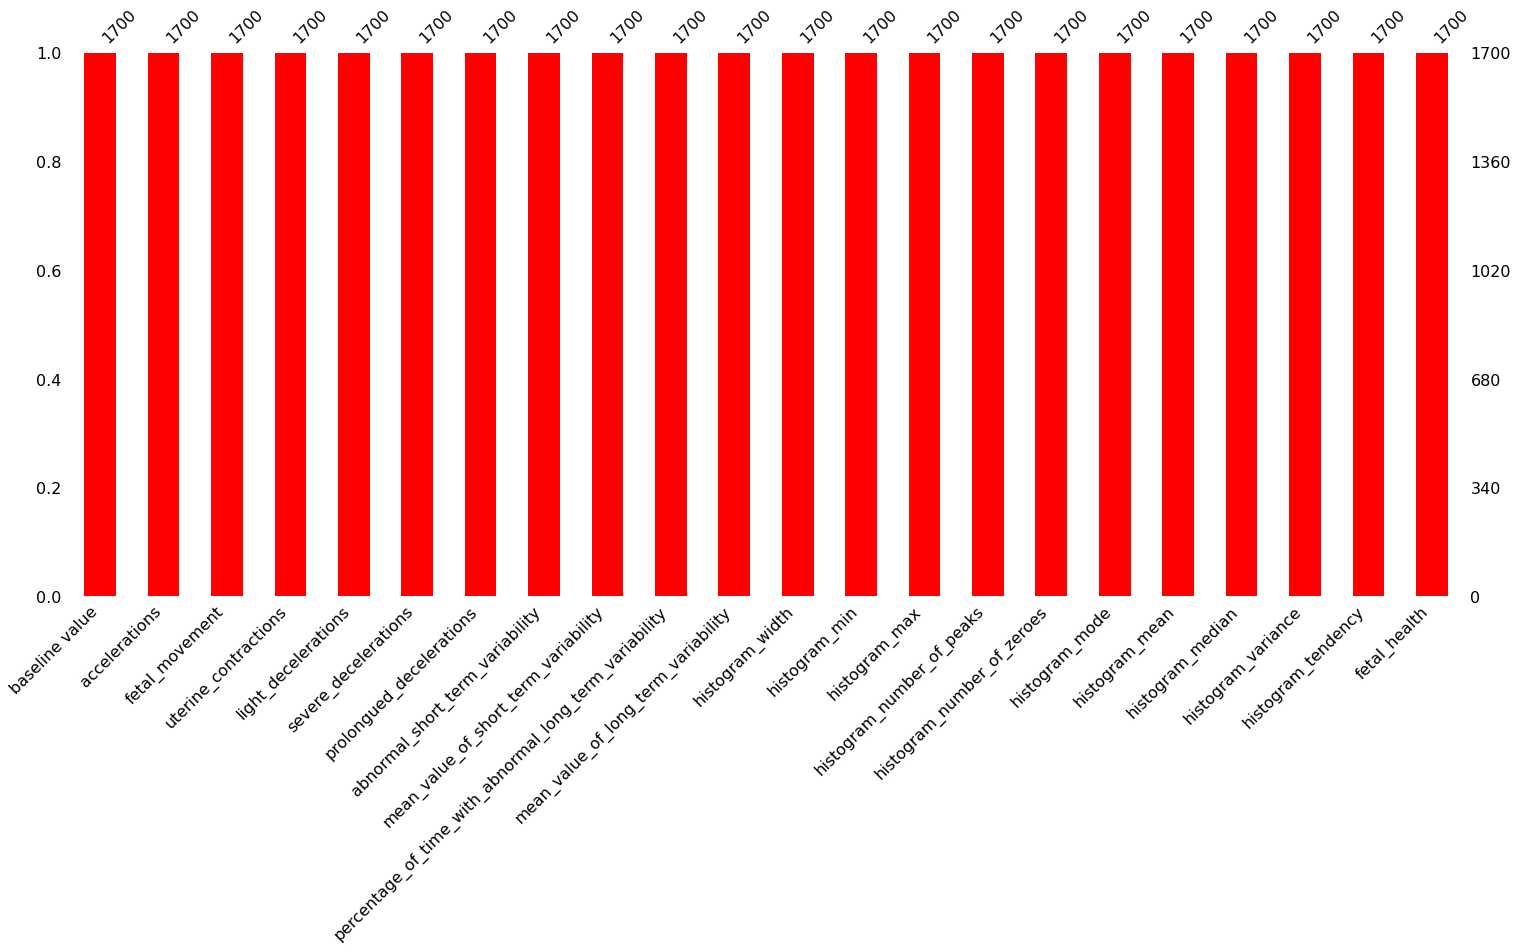

In [42]:
null_plot = msno.bar(df,color= "red")

<AxesSubplot:>

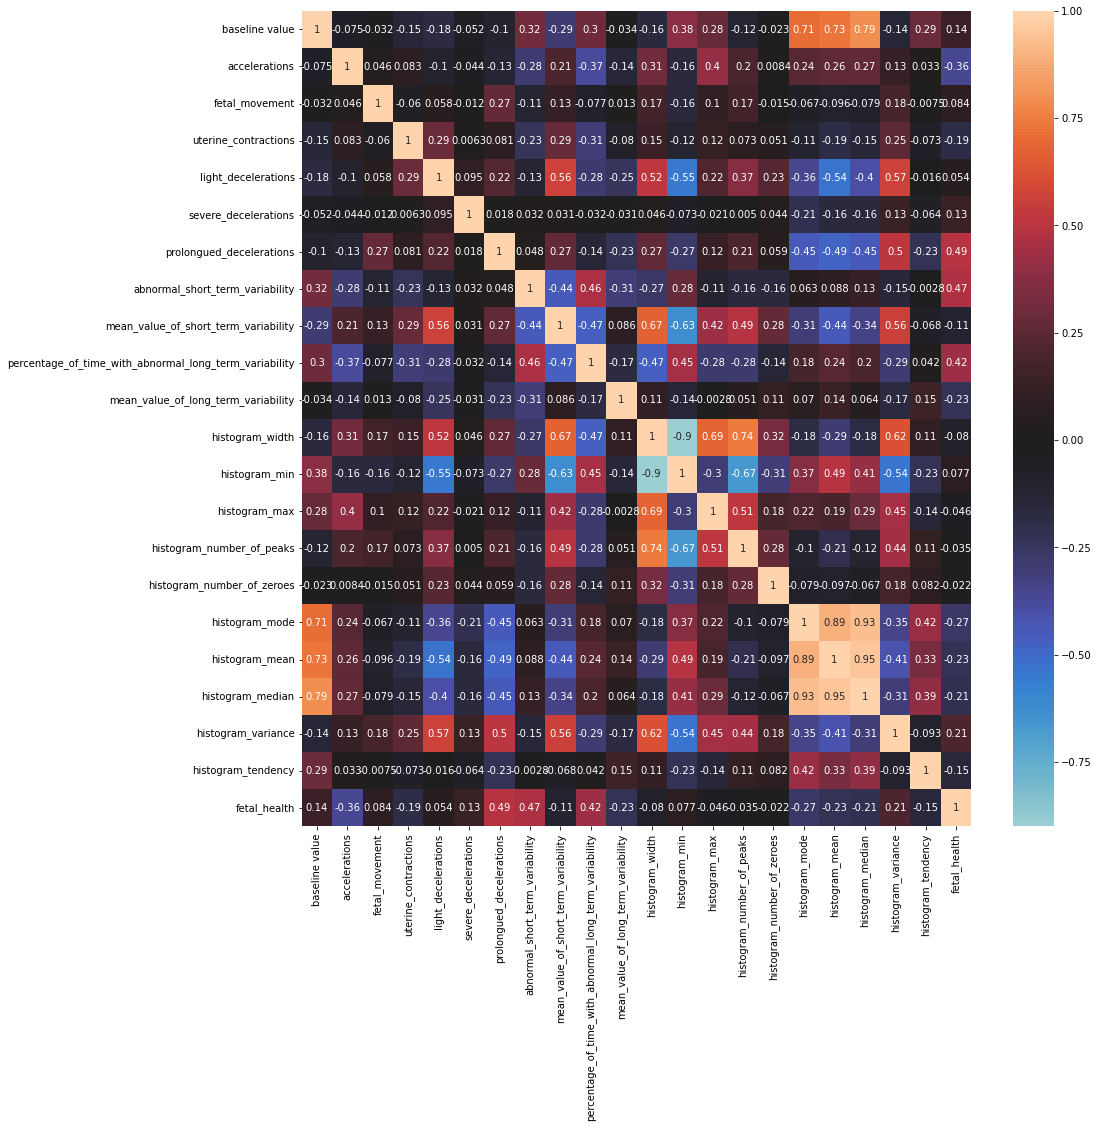

In [11]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(15,15))  

#cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, center=0)

observation from correlation matrix
prolongued_decelerations', 'abnormal_short_term_variability','mean_value_of_short_term_variability'
and 'histogram_variance' are highly correlated with 'fetal_health'

In [12]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

Lets observe the plot of these independent features with dependent features

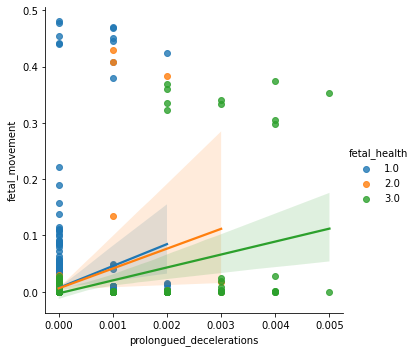

In [15]:
sns.lmplot(x="prolongued_decelerations",y="fetal_movement",data =df, hue="fetal_health")
plt.show()

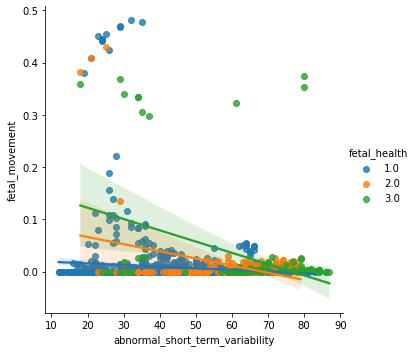

In [16]:
sns.lmplot(x="abnormal_short_term_variability",y="fetal_movement",data =df, hue="fetal_health")
plt.show()

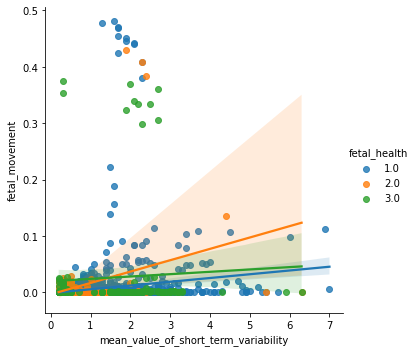

In [17]:
sns.lmplot(x="mean_value_of_short_term_variability",y="fetal_movement",data =df, hue="fetal_health")
plt.show()

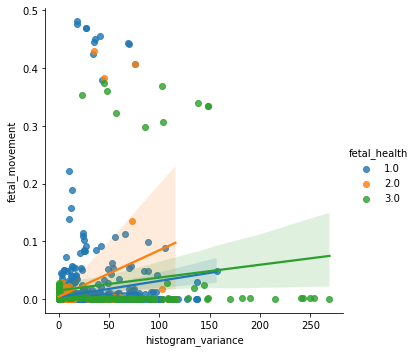

In [18]:
sns.lmplot(x="histogram_variance",y="fetal_movement",data =df, hue="fetal_health")
plt.show()

check the range of our feature attributes of dataset

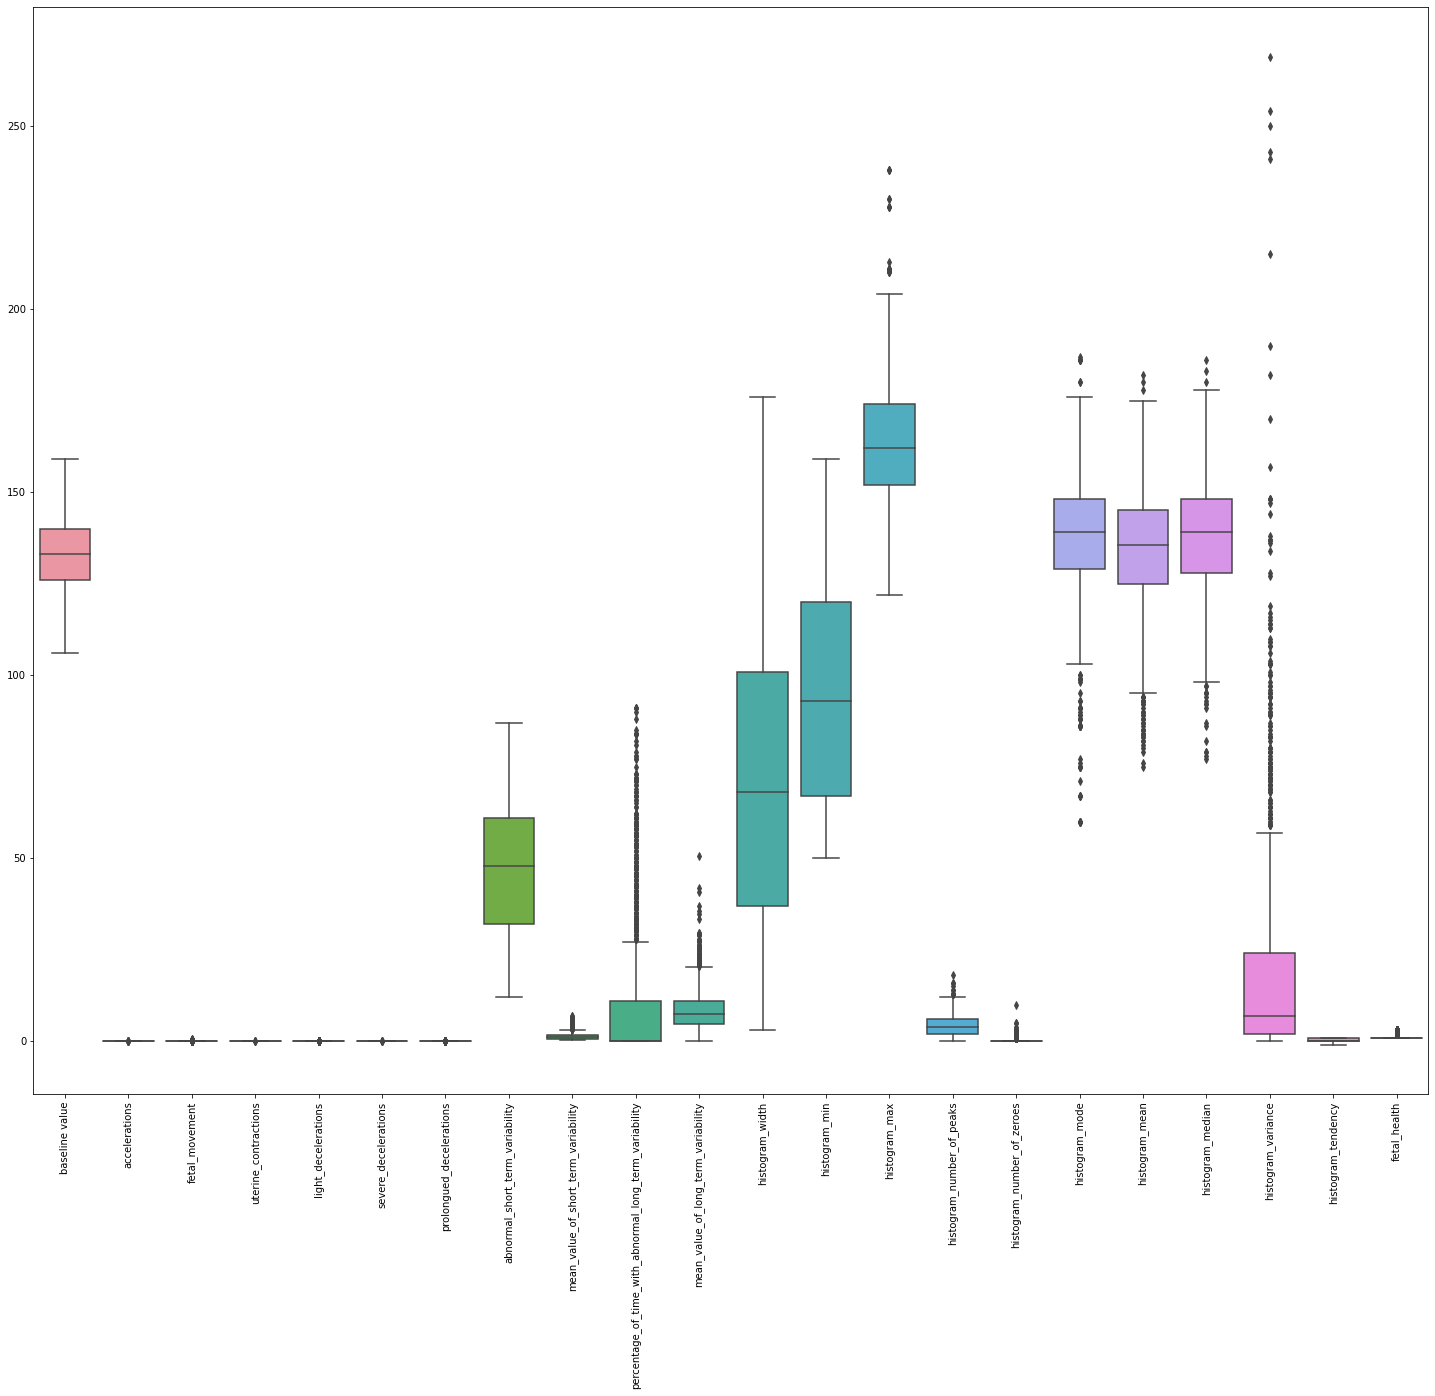

In [25]:
plt.figure(figsize=(25,20))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

As all the features are in different ranges, scale it to the same range to fit this in a model.

In [43]:
# to observe the number of individual cases - Normal,Suspect,Pathological
print(df["fetal_health"].value_counts())

1.0    1323
2.0     236
3.0     141
Name: fetal_health, dtype: int64


In [52]:
Normal,Suspect,Pathological=df["fetal_health"].value_counts()

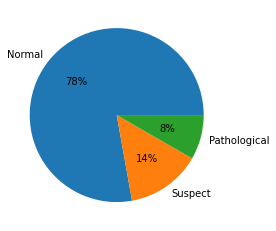

In [56]:
plt.pie([Normal, Suspect, Pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.show()

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

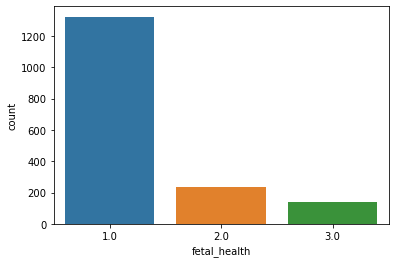

In [8]:
sns.countplot(data= df, x="fetal_health")     # check the target is balanced or not?

 The count plot of targets indicates an imbalance in data.

In [93]:
#Standardization transforms the data to have zero mean and a variance of 1
scale_X = StandardScaler()
X_transform=scale_X.fit_transform(df.drop(["fetal_health"],axis = 1))
X_train =  pd.DataFrame(X_transform)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.890180,-0.826476,-0.203779,0.898614,-0.638421,-0.059514,-0.268568,0.665317,-1.052998,-0.040514,...,-1.312076,1.452924,-0.444410,-1.396975,-0.474138,0.654766,0.803138,0.765511,-0.610364,-0.533914
1,-1.136072,-0.826476,-0.203779,0.558684,0.033809,-0.059514,-0.268568,-1.129524,0.060870,-0.314908,...,-0.458419,-0.071875,-1.124426,-0.030347,-0.474138,-0.670213,-0.926268,-1.090347,-0.441255,-0.533914
2,-0.426884,0.459927,-0.143909,-1.140964,-0.638421,-0.059514,-0.268568,-0.724237,0.395030,-0.534424,...,1.223028,-0.512372,1.822308,2.019595,-0.474138,-0.007723,0.098565,-0.059315,-0.441255,-0.533914
3,0.282305,0.717208,-0.203779,1.238543,-0.638421,-0.059514,-0.268568,-0.087358,-0.607451,-0.424666,...,-1.079261,1.215733,-0.331074,-0.713661,-0.474138,0.413861,0.546929,0.490569,-0.610364,-0.533914
4,1.092805,-0.826476,-0.203779,0.558684,-0.638421,-0.059514,-0.268568,-0.840034,-0.384677,-0.534424,...,-0.846445,0.978542,-0.217738,-1.055318,-0.474138,0.775219,0.803138,0.765511,-0.576542,1.110386


In [94]:
y_train= df["fetal_health"]

In [95]:
y_train.head(20)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     3.0
10    1.0
11    1.0
12    2.0
13    1.0
14    1.0
15    2.0
16    1.0
17    2.0
18    2.0
19    1.0
Name: fetal_health, dtype: float64

In [96]:
print(X_train.shape,y_train.shape)

(1700, 21) (1700,)


In [97]:
# Build a Logistic Regression Model
logistic_regression = LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)


In [98]:
#predict the fetal_health for test dataset given
pred_logistic_regression = logistic_regression_mod.predict(df_test)

In [124]:
#convert to Dataframe
df_result_logReg=pd.DataFrame(pred_logistic_regression,columns=["fetal_health"])
df_result_logReg

,fetal_health
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
421,2.0
422,2.0
423,2.0
424,2.0


In [125]:
#store the result in file "result_logReg"
df_result.to_csv("E:/edubridge/result_logReg.csv")

In [126]:
# Build a Logistic RandomForest Model
random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train, y_train)

#predict the fetal_health for test dataset given
pred_random_forest = random_forest_mod.predict(df_test)

#convert to Dataframe
df_result_rf=pd.DataFrame(pred_random_forest ,columns=["fetal_health"])
df_result_rf

#store the result in file "result_rf"
df_result_rf.to_csv("E:/edubridge/result_rf.csv")


,fetal_health
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
421,2.0
422,1.0
423,1.0
424,1.0
